In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# 🎬 Netflix Movies and TV Shows: Exploratory Data Analysis

Netflix has become a dominant force in the entertainment industry, offering thousands of movies and TV shows to a global audience. In this notebook, we explore the Netflix dataset to uncover trends, insights, and patterns.

We'll focus on:
- Content type distribution (Movies vs. TV Shows)
- Genre popularity
- Content availability by country
- Trends over time (when content was added)
- Ratings and age suitability


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# 📂 Dataset Overview

The dataset contains the following features:
- `title`: Name of the show/movie
- `type`: Movie or TV Show
- `director`, `cast`, `country`, `date_added`
- `release_year`, `rating`, `duration`
- `listed_in`: Genres/categories
- `description`: Short summary

Let’s begin by loading and inspecting the data.


# 🧹 Data Cleaning

Before we dive into the analysis, we need to:
- Handle missing values
- Convert date formats
- Create new time-related features (e.g., year added)

We’ll also look at the distribution of content types and clean the genre columns.


In [3]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 🔍 What's on Netflix?

## 1. Movies vs TV Shows


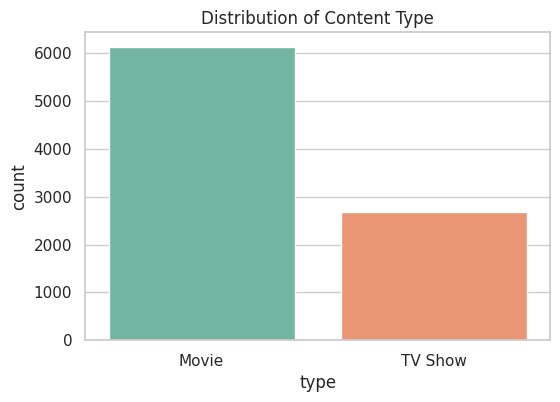

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Type')
plt.show()


**Insight:**  
Movies make up the majority of Netflix's catalog, with a smaller portion dedicated to TV Shows. This makes sense given the one-off nature of movies compared to episodic series.


##  Top Countries by Content

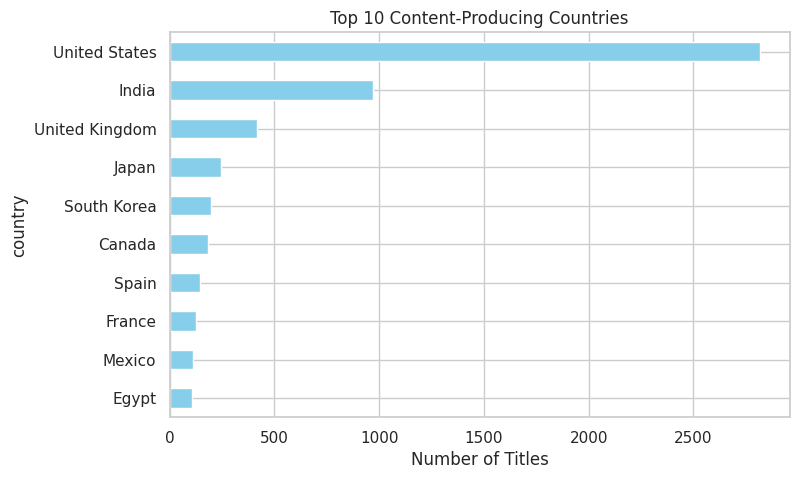

In [5]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue', figsize=(8,5), title='Top 10 Content-Producing Countries')
plt.gca().invert_yaxis()
plt.xlabel('Number of Titles')
plt.show()


**Insight:**  
The United States dominates in content production, followed by India, the UK, and others. Netflix clearly has strong regional partnerships.


## Content Over Time

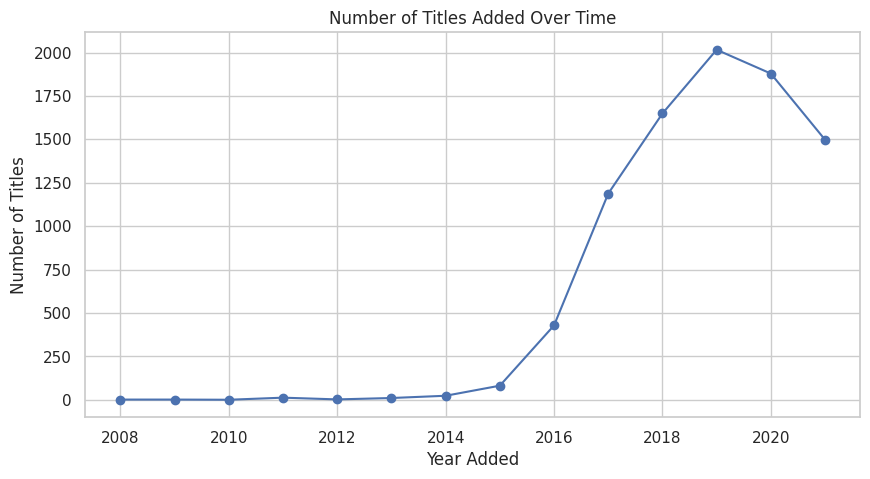

In [6]:
# Strip spaces and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Plot number of titles added per year
yearly_counts = df['year_added'].value_counts().sort_index()
yearly_counts.plot(kind='line', marker='o', figsize=(10,5), title='Number of Titles Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


##  Content Ratings

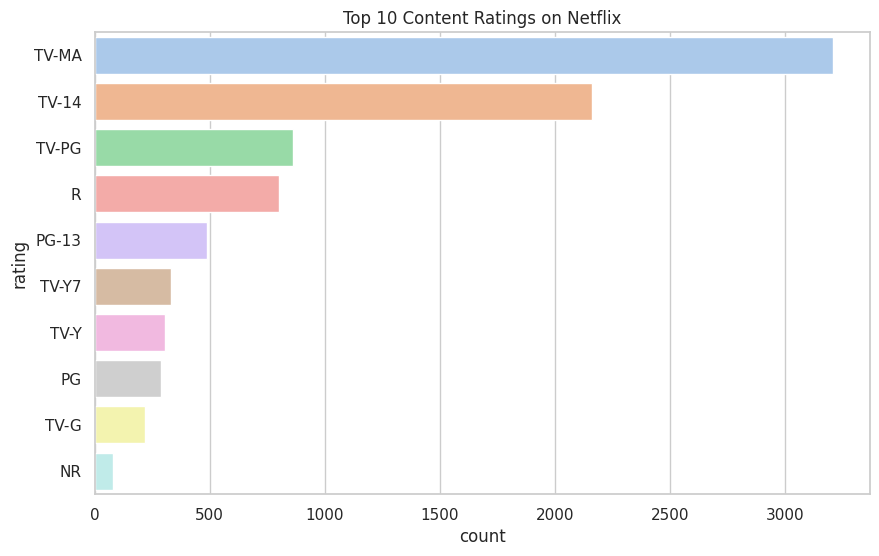

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Content Ratings on Netflix')
plt.show()


**Insight:**  
The most common rating is TV-MA (mature audiences), indicating Netflix’s trend toward adult content. However, there’s a good mix of PG and TV-PG, too.


## Popular Genres
 

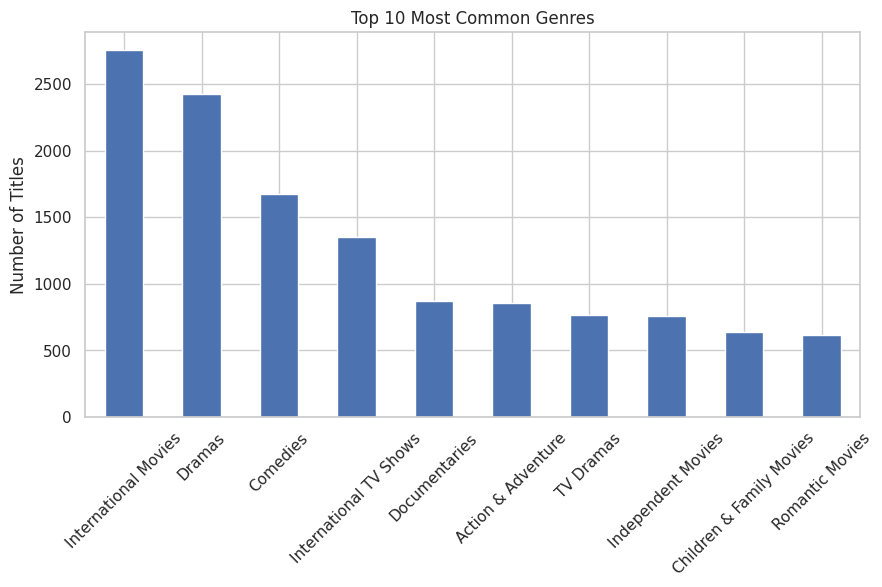

In [8]:

from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in genres])
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', figsize=(10,5), title='Top 10 Most Common Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
The most common genres are Drama, International Movies, and Comedies. This shows Netflix's appeal to global and light-hearted entertainment preferences.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR')])

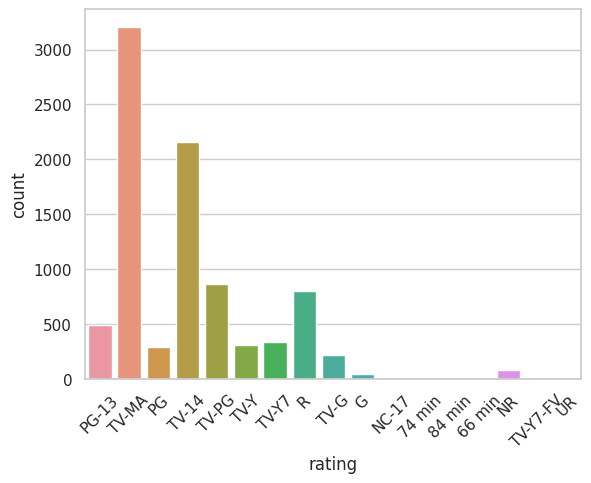

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=df)
plt.xticks(rotation=45)


In [10]:
import plotly.express as px
px.histogram(df, x='release_year', color='type')


# 💡 Summary of Insights

- **Movies dominate** the Netflix catalog, but TV Shows still have strong presence.
- **United States and India** are top contributors to content.
- **Content additions surged** after 2017, likely due to Netflix Originals.
- **TV-MA** is the most common rating, showing a lean toward mature content.
- **Drama, Comedy, and International** genres are most represented.
- Seasonal spikes are noticeable in content addition, often around end of year.

---

 

